# 3. Linear Regression

In [12]:
#3.1 Newspaper, radio, and television on sales

import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('data/Advertising.csv')

from statsmodels.formula.api import ols
model = ols("sales ~ TV + radio + newspaper", df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           1.58e-96
Time:                        17:37:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [13]:
#3 salary after graduation

50 + 20*4 + 0.07*110 + 35*1 + 0.01*4*110 + (-10)*4*1


137.1

#3.8 Linear regression on the auto data set

In [14]:
#3.8a Linear regression on the auto data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics
import statsmodels.api as sm

%matplotlib inline

In [15]:
df = pd.read_csv('data/auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [16]:
# prepare data for modelling (training set)
X = df['horsepower'] 
y = df['mpg']        
X.head()

0    130
1    165
2    150
3    150
4    140
Name: horsepower, dtype: object

In [18]:
X.unique() # check for data quality
# There are '?' in the data set, we need to remove them

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [19]:
Y.unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

In [20]:
# delete '?' observations
df = df[df.horsepower != '?']
X = df['horsepower']
y = df['mpg']

In [21]:
X.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [22]:
# create dataframe to use statsmodel
d = {'horsepower':X.astype('float'), 'mpg':y}
df = pd.DataFrame(data=d)
df.head()

,horsepower,mpg
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


/var/folders/ds/99sl88qd6_q22fhzhvr8vch40000gn/T/ipykernel_64364/1117752751.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


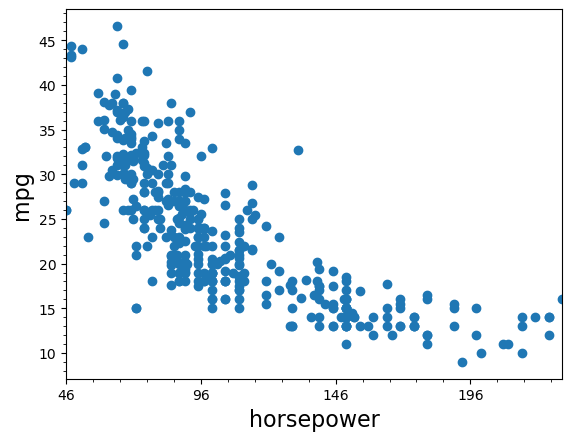

In [71]:
%matplotlib inline

import numpy as np
def scatter_plot(x, y):

    ax = plt.subplot(111)
    ax.xaxis.set_ticks(np.arange(min(x), max(x), 50))
    plt.xlim(min(x), max(x))
    plt.xlabel('horsepower', fontsize=16)
    plt.ylabel('mpg', fontsize=16)
    ax.minorticks_on()

    plt.scatter(x, y)


scatter_plot(df.iloc[:, 0], df.iloc[:, 1])
# Save plot to file.
fig.tight_layout()
fig.show()

/var/folders/ds/99sl88qd6_q22fhzhvr8vch40000gn/T/ipykernel_64364/1380448680.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


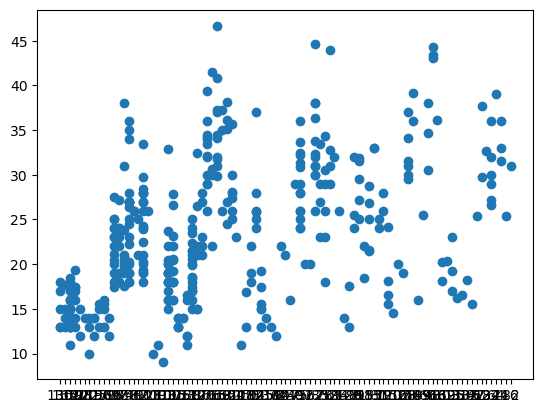

In [70]:
plt.scatter(X, y)

In [72]:
# using statsmodel for linear regression
mod = smf.ols(formula='mpg ~ horsepower', data = df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.03e-81
Time:                        15:03:42   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [73]:
# confidence and prediction intervals

from scipy.stats import t
from math import sqrt

def interval(x, y, x0,alpha = .05):
    n = np.size(x)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    S_xx = np.sum((x-x_bar)**2)         # page 541
    S_xy = np.sum((x-x_bar)*(y-y_bar))  # page 541
    b = S_xy/S_xx                       # page 542
    a = y_bar - b*x_bar                 # page 542
    S2 = np.sum((y-a-b*x)**2)/(n-2)     # page 552
    S = sqrt(S2)
    ts = t.ppf(1-alpha/2, n-2)
    w_conf = ts*S*sqrt(1/n + (x0-x_bar)**2/S_xx)      # page 558
    w_pred = ts*S*sqrt(1 + 1/n + (x0-x_bar)**2/S_xx)  # page 559
    print("                fit \t lwr \t  upr")
    print("confidence %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_conf, a+b*x0 + w_conf))
    print("prediction %3.5f %3.5f %3.5f" % (a+b*x0, a+b*x0 - w_pred, a+b*x0 + w_pred))

x = df['horsepower']
y = df['mpg']
x0 = 98    

interval(x, y, x0)

                fit 	 lwr 	  upr
confidence 24.46708 23.97308 24.96108
prediction 24.46708 14.80940 34.12476


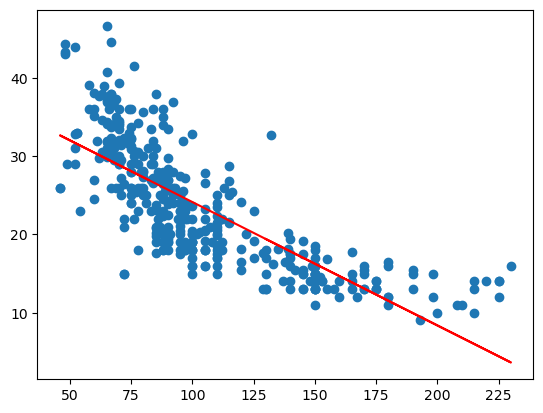

In [74]:
# abline plot
plt.subplots(1,1) #to get both plots in the same figure 
plt.scatter(X.astype('float'), y);
plt.plot(X.astype('float'), res.fittedvalues, color='red');